# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Clearly, well over half of the observations fall below the mean (roughly 69% of charges). The sample variance is also quite unhelpful since a value of just under 1 standard deviation corresponds with a negative charge.

<AxesSubplot:>

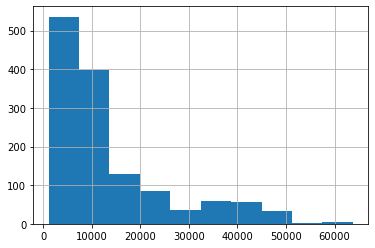

In [4]:
# a most simple histogram
medical.charges.hist()

In [5]:
x_bar = np.mean(medical.charges)
s = np.std(medical.charges)
# with Bessel's correction
s_bessel = np.std(medical.charges, ddof=1)
x_bar, s, s_bessel

(13270.422265141257, 12105.484975561605, 12110.011236693994)

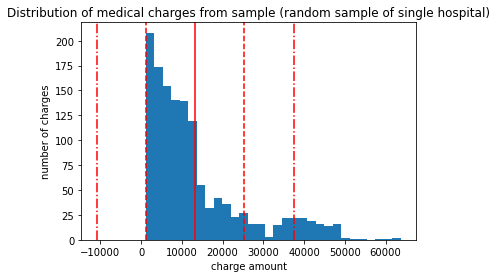

In [6]:
_ = plt.hist(medical.charges, bins=30)
_ = plt.xlabel('charge amount')
_ = plt.ylabel('number of charges')
_ = plt.title('Distribution of medical charges from sample (random sample of single hospital)')
_ = plt.axvline(x_bar, color='r')
_ = plt.axvline(x_bar+s, color='r', linestyle='--')
_ = plt.axvline(x_bar-s, color='r', linestyle='--')
_ = plt.axvline(x_bar+(2*s), color='r', linestyle='-.')
_ = plt.axvline(x_bar-(2*s), color='r', linestyle='-.')

Again, with Bessel's correction (below)

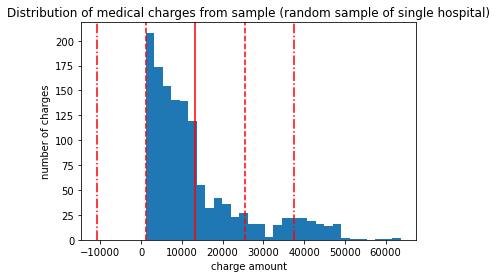

In [7]:
_ = plt.hist(medical.charges, bins=30)
_ = plt.xlabel('charge amount')
_ = plt.ylabel('number of charges')
_ = plt.title('Distribution of medical charges from sample (random sample of single hospital)')
_ = plt.axvline(x_bar, color='r')
_ = plt.axvline(x_bar+s_bessel, color='r', linestyle='--')
_ = plt.axvline(x_bar-s_bessel, color='r', linestyle='--')
_ = plt.axvline(x_bar+(2*s_bessel), color='r', linestyle='-.')
_ = plt.axvline(x_bar-(2*s_bessel), color='r', linestyle='-.')

In [8]:
np.sum(medical.charges < x_bar) / len(medical.charges)

0.6860986547085202

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ We can create a confidence interval for the mean by resampling the data and constructing a confidence interval of sampling distribution for the mean using the t-statistic (because we do not know the standard deviation of the population and can therefore not use the z-statistic). We should like to test that a mean value of 12,000 does not fall within the confidence interval. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Given the nature of the adminstrators concern that the true mean is below 12,000 (at least 1270 below the sample mean), we should use a one-sided test. We do not care to assess the propability of attaining a value at least 1270 greater than the sample mean.

mean:  12792.1586528


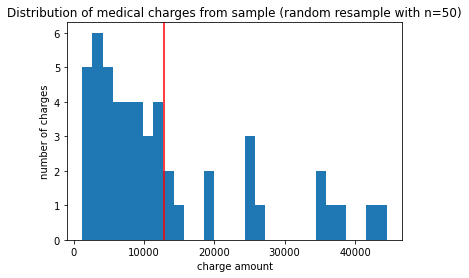

In [9]:
# First, we must resample our data to construct a sampling distribution of means
def charges_sampler(n):
    return np.random.choice(medical.charges, n)
resamples_collected = []
def multiple_charges_samples(t,n):
    """t = number of trials, n = sample size of each trial; sample n charges, t times, and return the mean of each trial"""
    means = []
    for i in range(t):
        sample = charges_sampler(n)
        mean = np.mean(sample)
        means.append(mean)
    resamples_collected.append(means)
    return means, t, n
def plot_sample_dist(resample):
    x_bar = np.mean(resample[0])
    s = np.std(resample[0],ddof=1)
    print(x_bar, s)
    _ = plt.hist(resample[0], bins=30)
    _ = plt.xlabel('mean charge amount')
    _ = plt.ylabel('number of trials')
    _ = plt.title('Sampling distribution for mean charges ({} trials of size {})'.format(resample[1],resample[2]))
    _ = plt.axvline(x_bar, color='r')
    _ = plt.axvline(x_bar+s, color='r', linestyle='--')
    _ = plt.axvline(x_bar-s, color='r', linestyle='--')
    _ = plt.axvline(x_bar+(2*s), color='r', linestyle='-.')
    _ = plt.axvline(x_bar-(2*s), color='r', linestyle='-.')
    plt.show()
# The df contains 1338 records, so let's arbitrarily test some values for sample sizes and number of trials
# But first, let's evaluate 1 possible resample of size n=50 with a simple histogram
seed(47)
one_such_resampling = charges_sampler(50)
print('mean: ',np.mean(one_such_resampling))
_ = plt.hist(one_such_resampling, bins=30)
_ = plt.xlabel('charge amount')
_ = plt.ylabel('number of charges')
_ = plt.title('Distribution of medical charges from sample (random resample with n=50)')
_ = plt.axvline(np.mean(one_such_resampling), color='r')

13280.97926038828 1707.2694329220953


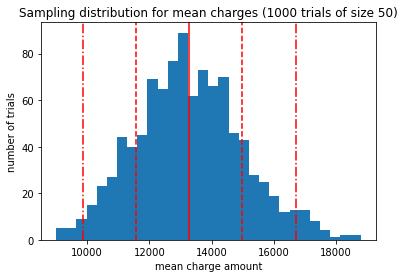

In [10]:
seed(47)
resample1 = multiple_charges_samples(1000,50)
plot_sample_dist(resample1)

13267.343653241584 1707.0157555965648


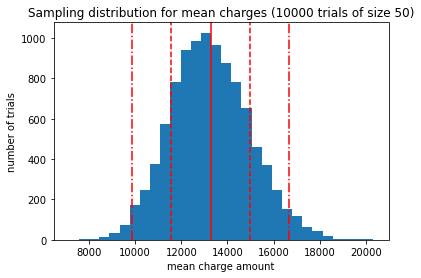

In [11]:
seed(47)
resample2 = multiple_charges_samples(10000,50)
plot_sample_dist(resample2)

13283.775887486629 1226.4118801848128


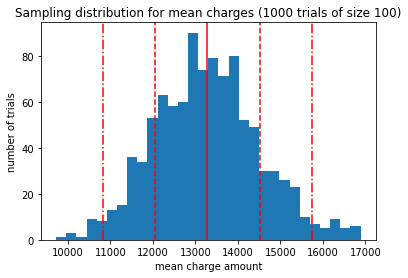

In [12]:
seed(47)
resample3 = multiple_charges_samples(1000,100)
plot_sample_dist(resample3)

13275.155937153513 1212.11624577866


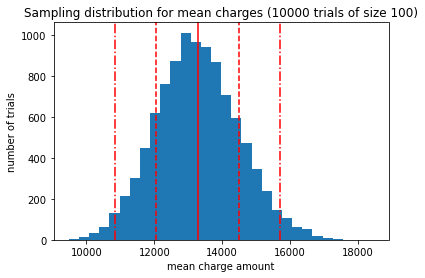

In [13]:
seed(47)
resample4 = multiple_charges_samples(10000,100)
plot_sample_dist(resample4)

13298.588779544358 684.584814999878


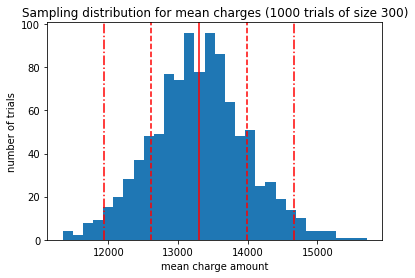

In [14]:
seed(47)
resample5 = multiple_charges_samples(1000,300)
plot_sample_dist(resample5)

13266.529917891234 695.5588200782161


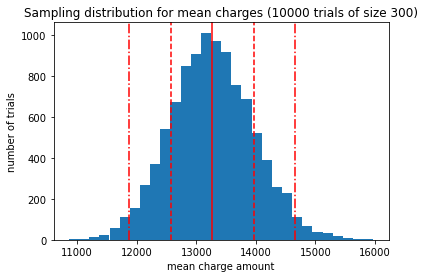

In [15]:
seed(47)
resample6 = multiple_charges_samples(10000,300)
plot_sample_dist(resample6)

13281.845379228835 459.22493996593937


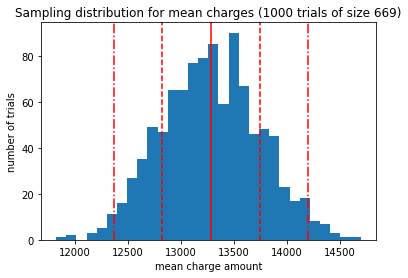

In [16]:
seed(47)
resample7 = multiple_charges_samples(1000,669)
plot_sample_dist(resample7)

13267.881504114926 469.23788324688866


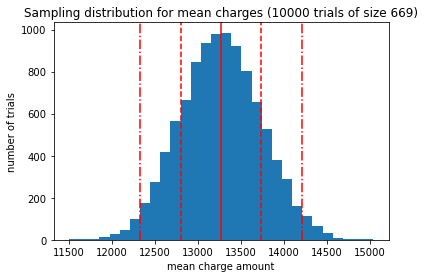

In [17]:
seed(47)
resample8 = multiple_charges_samples(10000,669)
plot_sample_dist(resample8)

In [18]:
CIs = []
for idx, resample in enumerate(resamples_collected):
    CIs.append(t.interval(0.95, len(resample)-1, loc=np.mean(resample),scale=np.std(resample,ddof=1)))
p_vals = []
for idx, resample in enumerate(resamples_collected):
    p_vals.append(t.cdf(12000, len(resample)-1, loc=np.mean(resample),scale=np.std(resample,ddof=1)))

In [19]:
CIs

[(9930.73366683946, 16631.2248539371),
 (9921.24921209963, 16613.438094383535),
 (10877.137006573343, 15690.414768399914),
 (10899.164140522207, 15651.14773378482),
 (11955.199613407725, 14641.97794568099),
 (11903.094639850933, 14629.965195931534),
 (12380.689239547153, 14183.001518910516),
 (12348.080812435364, 14187.682195794489)]

In [20]:
p_vals

[0.2266227118446853,
 0.22892144438904044,
 0.14772854432357946,
 0.1464106603652134,
 0.02906469055259109,
 0.03432740190185593,
 0.0026746765480892046,
 0.0034519862017832557]

__A:__ Going with a moderate resampling size of 300 and calculating a confidence interval of 95% for the sample distribution means, the likelihood of the true mean being < 12000 is highly unlikely as this value has a propobabily of occurance of roughly 3% under the null hypothesis that the sample mean is an accurate prediction of the population mean.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that people with and without insurance are charged the exact same amounts for treatments. The alternate hypothesis is that patients with insurance are charged different amounts for treatments than patients without. We will test the hypothesis by evaluating the mean charges for each group.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [21]:
insured = medical[medical.insuranceclaim == 1]
uninsured = medical[medical.insuranceclaim == 0]
n0, n1 = insured.shape[0], uninsured.shape[0]
s0, s1 = np.std(insured.charges, ddof=1), np.std(uninsured.charges, ddof=1)
x_bar0, x_bar1 = np.mean(insured.charges), np.mean(uninsured.charges)
print(n0, n1)
print(s0, s1)
print(x_bar0, x_bar1)

783 555
14045.928418802127 6446.510126811736
16423.928276537663 8821.421892306294


In [22]:
s_p_manual = np.sqrt(((n0 - 1)*(s0**2) + (n1 - 1)*(s1**2))/(n0 + n1 - 2))
t_manual = (x_bar0 - x_bar1)/(s_p_manual*np.sqrt((1/n0)+(1/n1)))
s_p_manual, t_manual, 2 * t.sf(t_manual, (n0+n1-2))
# 2 * t.sf because the test is 2-sided in this case 

(11520.034268775256, 11.89329903087671, 4.461230231620972e-31)

In [23]:
from scipy.stats import ttest_ind
ttest_ind(insured.charges, uninsured.charges)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

In [24]:
from scipy import stats
stats?

__A:__ It seems that the most appropriate function would be `scipy.stats.norm` because you would be performing a z-test on data that is known or assumed to be normally distributed.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test